* Different Models
* Different Vectorize
* Hyperparameter tuning
* AWS for NLP(Amazon Comprehend/Amazon Lex/ Amazon Forecast)
* Read up on BERT/ lemmetization

#Mounting to Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Data Analytics/AI ML/NLP/Sentiment Analysis/YouTube-Spam-Collection-v1.zip'

Archive:  /content/drive/MyDrive/Data Analytics/AI ML/NLP/Sentiment Analysis/YouTube-Spam-Collection-v1.zip
  inflating: Youtube01-Psy.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._Youtube01-Psy.csv  
  inflating: Youtube02-KatyPerry.csv  
  inflating: __MACOSX/._Youtube02-KatyPerry.csv  
  inflating: Youtube03-LMFAO.csv     
  inflating: __MACOSX/._Youtube03-LMFAO.csv  
  inflating: Youtube04-Eminem.csv    
  inflating: __MACOSX/._Youtube04-Eminem.csv  
  inflating: Youtube05-Shakira.csv   
  inflating: __MACOSX/._Youtube05-Shakira.csv  


#Importing Packages

In [1]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Ignore harmless warnings
import sys
import warnings
warnings.filterwarnings("ignore")

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels as sm
import matplotlib
import math

In [4]:
from tqdm import tqdm
import re
import string
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import contractions
stopwords=stopwords.words('english')
#Removing stopwords 'no','nor' and 'not'
stopwords.remove('no')
stopwords.remove('nor')
stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.svm import SVC as svc 
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

In [6]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

#Importing CSV

In [42]:
df_psy = pd.read_csv('/content/Youtube01-Psy.csv')
df_katy = pd.read_csv('/content/Youtube02-KatyPerry.csv')
df_lmfao = pd.read_csv('/content/Youtube03-LMFAO.csv')
df_eminem = pd.read_csv('/content/Youtube04-Eminem.csv')
df_shakira = pd.read_csv('/content/Youtube05-Shakira.csv')

In [43]:
df_psy

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


In [44]:
df_katy

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1
...,...,...,...,...,...
345,z12sjp3zgtqnvlysj23zuxxaolrvd1oj504,Kacy Cluley,2015-06-05T18:59:52,This song means so much to me thank you soooo...,0
346,z132enrpoy35yxpoe04cjr4zur3jvbyq3xo0k,Kasia Fabisiewicz,2015-06-05T19:02:05,&lt;3﻿,0
347,z132jbmxfqm4fjysg23nwjfb2mv2vxnua,Decio Alves Martins,2015-06-05T19:29:20,"KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA...",1
348,z12cdlswetvnejcri04cex0jfwy2u3tzj54,Rafi Hossain,2015-06-05T19:55:08,Honestly speaking except taylor swift and adel...,0


In [45]:
df_lmfao

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0
...,...,...,...,...,...
433,z13lvr4iupatjlrem231yvpxolzvspwdl,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,1
434,z12lxhrqdkyusbkji04cihtrvn3jvxnqszg0k,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,0
435,z12xhdjrsxm3v550w22oynsjrnmvjhkvj,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,1
436,z13msngo3qvwx1ym223pehqgouexzdmnm,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


In [46]:
df_eminem

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
...,...,...,...,...,...
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1
445,LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8,The Guy That's Done Everything,NaN,3 yrs ago I had a health scare but thankfully ...,1
446,z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k,Jesse Pinkman,2015-05-06T11:42:44.601000,Rihanna looks so beautiful with red hair ;)﻿,0


In [47]:
df_shakira

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


#Data Cleaning

In [48]:
df_psy.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_katy.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_lmfao.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_eminem.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_shakira.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)

In [50]:
#Remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
def removeNumbers(sentence):
    sentence = re.sub("\S*\d\S*", " ", sentence).strip()
    return (sentence)
#Function to clean html tags from a sentence
def removeHtml(sentence): 
    pattern = re.compile('<.*?>')
    cleaned_text = re.sub(pattern,' ',sentence)
    return cleaned_text
#Remove URL from sentences.
def removeURL(sentence):
    text = re.sub(r"http\S+", " ", sentence)
    sentence = re.sub(r"www.\S+", " ", text)
    return (sentence)
    
#Function to keep only words containing letters A-Z and a-z. This will remove all punctuations, special characters etc. https://stackoverflow.com/a/5843547/4084039
def removePunctuations(sentence):
    cleaned_text  = re.sub('[^a-zA-Z]',' ',sentence)
    return (cleaned_text)
#https://stackoverflow.com/questions/37012948/regex-to-match-an-entire-word-that-contains-repeated-character
#Remove words like 'zzzzzzzzzzzzzzzzzzzzzzz', 'testtting', 'grrrrrrreeeettttt' etc. Preserves words like 'looks', 'goods', 'soon' etc. We will remove all such words which has three consecutive repeating characters.
def removePatterns(sentence): 
    cleaned_text  = re.sub("\\s*\\b(?=\\w*(\\w)\\1{2,})\\w*\\b",' ',sentence)
    cleaned_text  = re.sub(r"\S*\.com\S*|\S*watch\?\S*",'', sentence)
    return (cleaned_text)
#Expand the movie plots x is an input string of any length. Convert all the words to lower case
def decontracted(x):
    x = str(x).lower()
    x = x.replace(",000,000", " m").replace(",000", " k").replace("′", "'").replace("’", "'")\
                           .replace("won't", " will not").replace("cannot", " can not").replace("can't", " can not")\
                           .replace("n't", " not").replace("what's", " what is").replace("it's", " it is")\
                           .replace("'ve", " have").replace("'m", " am").replace("'re", " are")\
                           .replace("he's", " he is").replace("she's", " she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("how's"," how has").replace("y'all"," you all")\
                           .replace("o'clock"," of the clock").replace("ne'er"," never").replace("let's"," let us")\
                           .replace("finna"," fixing to").replace("gonna"," going to").replace("gimme"," give me").replace("gotta"," got to").replace("'d"," would")\
                           .replace("daresn't"," dare not").replace("dasn't"," dare not").replace("e'er"," ever").replace("everyone's"," everyone is")\
                           .replace("'cause'"," because")
    
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    return x
# #Stemming and stopwords removal
# from nltk.stem.snowball import SnowballStemmer
# sno = SnowballStemmer(language='english')
#Removing the word 'not' from stopwords
# default_stopwords = set(stopwords.words('english'))
# remove_not = set(['no', 'nor', 'not'])
# custom_stopwords = default_stopwords - remove_not
# print(custom_stopwords)

In [51]:
# Combining all the above data cleaning methodologies as discussed above.
def clean_text_data(data):
  string=' '    
  stemed_word=' '
  preprocessed_book_abstract =[]
  for book_abstract in tqdm(data):
      filtered_sentence=[]
      book_abstract = decontracted(book_abstract)
      book_abstract = removeNumbers(book_abstract)
      book_abstract = removeHtml(book_abstract)
      book_abstract = removeURL(book_abstract)
      book_abstract = removePunctuations(book_abstract)
      book_abstract = removePatterns(book_abstract)
      
      for cleaned_words in book_abstract.split():   
          if((cleaned_words not in stopwords) and (len(cleaned_words)>2)):
              stemed_word=(sno.stem(cleaned_words.lower()))                                   
              filtered_sentence.append(stemed_word)
          else:
              continue
      book_abstract = " ".join(filtered_sentence) #Final string of cleaned words    
      preprocessed_book_abstract.append(book_abstract.strip()) #Data corpus contaning cleaned movie_plots from the whole dataset
  return preprocessed_book_abstract

# round = lambda x: clean_text_data(x)

In [52]:
cleaned_text = clean_text_data(df_psy.CONTENT)
df_psy['CleanedContent'] = cleaned_text

100%|██████████| 350/350 [00:00<00:00, 2308.07it/s]


In [53]:
cleaned_text = clean_text_data(df_katy.CONTENT)
df_katy['CleanedContent'] = cleaned_text

100%|██████████| 350/350 [00:00<00:00, 1873.80it/s]


In [54]:
cleaned_text = clean_text_data(df_lmfao.CONTENT)
df_lmfao['CleanedContent'] = cleaned_text

100%|██████████| 438/438 [00:00<00:00, 2419.48it/s]


In [55]:
cleaned_text = clean_text_data(df_eminem.CONTENT)
df_eminem['CleanedContent'] = cleaned_text

100%|██████████| 448/448 [00:00<00:00, 1582.40it/s]


In [56]:
cleaned_text = clean_text_data(df_shakira.CONTENT)
df_shakira['CleanedContent'] = cleaned_text

100%|██████████| 370/370 [00:00<00:00, 1658.41it/s]


In [57]:
df_psy.head()

,CONTENT,CLASS,CleanedContent
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check tube channel
1,Hey guys check out my new channel and our firs...,1,hey guy check new channel first vid monkey mon...
2,just for test I have to say murdev.com,1,test say murdev com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,shake sexi ass channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch vtarggvgtwq check


##Data Cleaning

In [ ]:
# df_psy[['Date','Time']] = None
# df_katy[['Date','Time']] = None
# df_lmfao[['Date','Time']] = None
# df_eminem[['Date','Time']] = None
# df_shakira[['Date','Time']] = None

In [ ]:
# df_psy.head()

In [ ]:
# for i in range(df_psy.shape[0]):
#   datetime = df_psy.iloc[i,2].split('T')
#   df_psy.iloc[i,5] = datetime[0]
#   df_psy.iloc[i,6] = datetime[1]

In [ ]:
# for i in range(df_katy.shape[0]):
#   datetime = df_katy.iloc[i,2].split('T')
#   df_katy.iloc[i,5] = datetime[0]
#   df_katy.iloc[i,6] = datetime[1]

In [ ]:
# for i in range(df_lmfao.shape[0]):
#   datetime = df_lmfao.iloc[i,2].split('T')
#   df_lmfao.iloc[i,5] = datetime[0]
#   df_lmfao.iloc[i,6] = datetime[1]

In [ ]:
# for i in range(df_eminem.shape[0]):
#   datetime = df_eminem.iloc[i,2].split('T')
#   df_eminem.iloc[i,5] = datetime[0]
#   df_eminem.iloc[i,6] = datetime[1]

In [ ]:
# for i in range(df_shakira.shape[0]):
#   datetime = df_shakira.iloc[i,2].split('T')
#   df_shakira.iloc[i,5] = datetime[0]
#   df_shakira.iloc[i,6] = datetime[1]

In [ ]:
# df_psy.drop(columns = ['COMMENT_ID', 'DATE'], inplace = True)
# df_katy.drop(columns = ['COMMENT_ID', 'DATE'], inplace = True)
# df_lmfao.drop(columns = ['COMMENT_ID', 'DATE'], inplace = True)
# df_eminem.drop(columns = ['COMMENT_ID', 'DATE'], inplace = True)
# df_shakira.drop(columns = ['COMMENT_ID', 'DATE'], inplace = True)

In [ ]:
# df_psy.head()

In [ ]:


# def clean_text_round1(text):
#     '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
#     text = text.lower()
#     text = text.replace(",000,000", " m").replace(",000", " k").replace("′", "'").replace("’", "'")\
#                         .replace("won't", " will not").replace("cannot", " can not").replace("can't", " can not")\
#                         .replace("n't", " not").replace("what's", " what is").replace("it's", " it is")\
#                         .replace("'ve", " have").replace("'m", " am").replace("'re", " are")\
#                         .replace("he's", " he is").replace("she's", " she is").replace("'s", " own")\
#                         .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
#                         .replace("€", " euro ").replace("'ll", " will").replace("how's"," how has").replace("y'all"," you all")\
#                         .replace("o'clock"," of the clock").replace("ne'er"," never").replace("let's"," let us")\
#                         .replace("finna"," fixing to").replace("gonna"," going to").replace("gimme"," give me").replace("gotta"," got to").replace("'d"," would")\
#                         .replace("daresn't"," dare not").replace("dasn't"," dare not").replace("e'er"," ever").replace("everyone's"," everyone is")\
#                         .replace("'cause'"," because").replace("'yrs'","'years'")
#     text = re.sub(r"([0-9]+)000000", r"\1m", text)
#     text = re.sub(r"([0-9]+)000", r"\1k", text)
#     text = re.sub(r'\w*?\w*=\w*', '', text)
#     sentence = re.sub(r"http\S+", " ", text)
#     text = re.sub(r"www.\S+", " ", sentence)
#     # text = re.sub('[%s].com', '', text)
#     text = re.sub('[  ,.]', ' ', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\w*\d\w*', '', text)

#     return text

# round1 = lambda x: clean_text_round1(x)
  

In [ ]:
# # Let's take a look at the updated text
# clean_data_psy = df_psy.CONTENT.apply(round1)
# df_psy['cleaned_content'] = clean_data_psy

In [ ]:
# clean_data_katy = df_katy.CONTENT.apply(round1)
# df_katy['cleaned_content'] = clean_data_katy

In [ ]:
# clean_data_lmfao = df_lmfao.CONTENT.apply(round1)
# df_lmfao['cleaned_content'] = clean_data_lmfao

In [ ]:
# clean_data_eminem = df_eminem.CONTENT.apply(round1)
# df_eminem['cleaned_content'] = clean_data_eminem

In [ ]:
# clean_data_shakira = df_shakira.CONTENT.apply(round1)
# df_shakira['cleaned_content'] = clean_data_shakira

In [ ]:
# df_shakira.head()

In [ ]:
# #Stemming and stopwords removal
# sno = SnowballStemmer(language='english')
# #Removing the word 'not' from stopwords
# default_stopwords = set(stopwords.words('english'))
# remove_not = set(['no', 'nor', 'not'])
# custom_stopwords = default_stopwords - remove_not
# print(custom_stopwords)

In [ ]:
# def clean_text_round2(text):
#   string=' '    
#   stemed_word=' '
#   filtered_sentence=[]
#   for cleaned_words in text.split():   
#       if((cleaned_words not in custom_stopwords) and (len(cleaned_words)>2)):
#           stemed_word=(sno.stem(cleaned_words.lower()))                                   
#           filtered_sentence.append(stemed_word)
#       else:
#           continue
#   text = " ".join(filtered_sentence)
#   return text

# round2 = lambda x: clean_text_round2(x)

In [ ]:
# clean_data_psy = df_psy.cleaned_content.apply(round1)
# df_psy['cleaned_content2'] = clean_data_psy

In [ ]:
# df_psy.head()

#Document-Term Matrix

In [33]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()

In [34]:
# vectorizer.fit(df_psy.CleanedContent)
# vector = vectorizer.transform(df_psy.CleanedContent)
# dtmatrix_psy = pd.DataFrame(vector.toarray(), columns = vectorizer.vocabulary_)

In [38]:
# dtmatrix_psy

,huh,anyway,check,tube,channel,hey,guy,new,first,vid,...,worldwid,crdit,link,someth,lool,hear,duti,photo,editor,thought
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Manually creating D-T Matrix

In [54]:
df = df_psy[['CleanedContent','CLASS']].copy()

In [55]:
vocab=[]
for comment in df["CleanedContent"]:
    for word in comment.split():
        vocab.append(word)
vocabulary=list(set(vocab))
print("Length of vocabulary of the data is ",len(vocabulary))
for word in vocabulary:
    df[word]=0
for index,value in enumerate(df["CleanedContent"]):
  for l in value.split():
    df[l][index]+=1

Length of vocabulary of the data is  842


In [56]:
df.head()

,CleanedContent,CLASS,hope,apocalyps,gamestop,singl,inspir,stay,band,foto,...,auburn,tumor,pour,get,post,updat,michael,leav,luca,minut
0,huh anyway check tube channel,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hey guy check new channel first vid monkey mon...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,test say murdev com,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,shake sexi ass channel enjoy,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,watch vtarggvgtwq check,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Vectorization (TFIDF)

##SVM (No Hyperparamter Tuning)

###Model Fitting(Psy)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_psy['CleanedContent'], df_psy['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [60]:
print(X_train)

  (0, 469)	0.3005453255820809
  (0, 644)	0.28061457845995363
  (0, 216)	0.36245588088512376
  (0, 393)	0.28861856183026924
  (0, 426)	0.7850178506284553
  (1, 490)	0.3674592469800179
  (1, 608)	0.3674592469800179
  (1, 212)	0.3674592469800179
  (1, 372)	0.275405267904327
  (1, 21)	0.282613937566555
  (1, 194)	0.282613937566555
  (1, 497)	0.22653423845002113
  (1, 710)	0.15929592155880992
  (1, 65)	0.1922840993657913
  (1, 300)	0.23648087694579079
  (1, 189)	0.3426435847955382
  (1, 426)	0.2689568931567526
  (2, 541)	0.3133964175552675
  (2, 538)	0.27721524068316467
  (2, 625)	0.3133964175552675
  (2, 204)	0.29223178585312776
  (2, 203)	0.3133964175552675
  (2, 68)	0.3133964175552675
  (2, 388)	0.29223178585312776
  (2, 266)	0.3133964175552675
  :	:
  (293, 460)	0.19176180483446317
  (293, 511)	0.31372893460274026
  (293, 644)	0.45309117745303384
  (294, 406)	0.3536528173543921
  (294, 397)	0.32976954616668036
  (294, 523)	0.31282409558459
  (294, 689)	0.31282409558459
  (294, 78)	0.329

In [42]:
from sklearn.svm import SVC as svc 
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

SVC(C=1000)

In [43]:
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

In [44]:
cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,16,3
Predicted to be Spam,0,34


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.92      1.00      0.96        34

    accuracy                           0.94        53
   macro avg       0.96      0.92      0.94        53
weighted avg       0.95      0.94      0.94        53



####Using Fitted model(Psy) to predict for other datasets

#####Eminem

In [46]:
X_test2 = vectorizer.transform(df_eminem['CleanedContent'])
y_pred = svm.predict(X_test2)

In [47]:
y_test2 = df_eminem['CLASS']
cm = confusion_matrix(y_test2, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,147,56
Predicted to be Spam,57,188


#####Katy Perry

In [48]:
X_test3 = vectorizer.transform(df_katy['CleanedContent'])
y_pred = svm.predict(X_test3)

In [49]:
y_test3 = df_katy['CLASS']
cm = confusion_matrix(y_test3, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,138,37
Predicted to be Spam,36,139


#####LMFAO

In [50]:
X_test4 = vectorizer.transform(df_lmfao['CleanedContent'])
y_pred = svm.predict(X_test4)

In [51]:
y_test4 = df_lmfao['CLASS']
cm = confusion_matrix(y_test4, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,157,45
Predicted to be Spam,148,88


#####Shakira

In [52]:
X_test5 = vectorizer.transform(df_shakira['CleanedContent'])
y_pred = svm.predict(X_test5)

In [53]:
y_test5 = df_shakira['CLASS']
cm = confusion_matrix(y_test5, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,149,47
Predicted to be Spam,42,132


###Model Fitting(Katy Perry)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_katy['CleanedContent'], df_katy['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [42]:
from sklearn.svm import SVC as svc 
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

SVC(C=1000)

In [43]:
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

In [44]:
cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,21,3
Predicted to be Spam,5,24


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.89      0.83      0.86        29

    accuracy                           0.85        53
   macro avg       0.85      0.85      0.85        53
weighted avg       0.85      0.85      0.85        53



####Using Fitted model(Katy Perry) to predict for other datasets

#####Psy

In [46]:
X_test2 = vectorizer.transform(df_psy['CleanedContent'])
y_pred = svm.predict(X_test2)

In [47]:
y_test2 = df_psy['CLASS']
cm = confusion_matrix(y_test2, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,136,39
Predicted to be Spam,11,164


#####Eminem

In [48]:
X_test3 = vectorizer.transform(df_eminem['CleanedContent'])
y_pred = svm.predict(X_test3)

In [49]:
y_test3 = df_eminem['CLASS']
cm = confusion_matrix(y_test3, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,151,52
Predicted to be Spam,20,225


#####LMFAO

In [50]:
X_test4 = vectorizer.transform(df_lmfao['CleanedContent'])
y_pred = svm.predict(X_test4)

In [51]:
y_test4 = df_lmfao['CLASS']
cm = confusion_matrix(y_test4, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,159,43
Predicted to be Spam,19,217


#####Shakira

In [52]:
X_test5 = vectorizer.transform(df_shakira['CleanedContent'])
y_pred = svm.predict(X_test5)

In [53]:
y_test5 = df_shakira['CLASS']
cm = confusion_matrix(y_test5, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,167,29
Predicted to be Spam,20,154


###Model Fitting(LMFAO)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_lmfao['CleanedContent'], df_lmfao['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [42]:
from sklearn.svm import SVC as svc 
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

SVC(C=1000)

In [43]:
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

In [44]:
cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,29,0
Predicted to be Spam,4,33


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        29
           1       1.00      0.89      0.94        37

    accuracy                           0.94        66
   macro avg       0.94      0.95      0.94        66
weighted avg       0.95      0.94      0.94        66



####Using Fitted model(LMFAO) to predict for other datasets

#####Psy

In [46]:
X_test2 = vectorizer.transform(df_psy['CleanedContent'])
y_pred = svm.predict(X_test2)

In [47]:
y_test2 = df_psy['CLASS']
cm = confusion_matrix(y_test2, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,162,13
Predicted to be Spam,67,108


#####Katy Perry

In [48]:
X_test3 = vectorizer.transform(df_katy['CleanedContent'])
y_pred = svm.predict(X_test3)

In [49]:
y_test3 = df_katy['CLASS']
cm = confusion_matrix(y_test3, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,165,10
Predicted to be Spam,91,84


#####Eminem

In [50]:
X_test4 = vectorizer.transform(df_eminem['CleanedContent'])
y_pred = svm.predict(X_test4)

In [51]:
y_test4 = df_eminem['CLASS']
cm = confusion_matrix(y_test4, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,196,7
Predicted to be Spam,46,199


#####Shakira

In [52]:
X_test5 = vectorizer.transform(df_shakira['CleanedContent'])
y_pred = svm.predict(X_test5)

In [53]:
y_test5 = df_shakira['CLASS']
cm = confusion_matrix(y_test5, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,191,5
Predicted to be Spam,62,112


###Model Fitting(Eminem)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_eminem['CleanedContent'], df_eminem['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [43]:
from sklearn.svm import SVC as svc 
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

SVC(C=1000)

In [44]:
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

In [45]:
cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,32,1
Predicted to be Spam,3,32


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.97      0.91      0.94        35

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68



####Using Fitted model(Eminem) to predict for other datasets

#####Psy

In [47]:
X_test2 = vectorizer.transform(df_psy['CleanedContent'])
y_pred = svm.predict(X_test2)

In [48]:
y_test2 = df_psy['CLASS']
cm = confusion_matrix(y_test2, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,126,49
Predicted to be Spam,47,128


#####Katy Perry

In [49]:
X_test3 = vectorizer.transform(df_katy['CleanedContent'])
y_pred = svm.predict(X_test3)

In [50]:
y_test3 = df_katy['CLASS']
cm = confusion_matrix(y_test3, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,157,18
Predicted to be Spam,64,111


#####LMFAO

In [51]:
X_test4 = vectorizer.transform(df_lmfao['CleanedContent'])
y_pred = svm.predict(X_test4)

In [52]:
y_test4 = df_lmfao['CLASS']
cm = confusion_matrix(y_test4, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,194,8
Predicted to be Spam,21,215


#####Shakira

In [53]:
X_test5 = vectorizer.transform(df_shakira['CleanedContent'])
y_pred = svm.predict(X_test5)

In [54]:
y_test5 = df_shakira['CLASS']
cm = confusion_matrix(y_test5, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,191,5
Predicted to be Spam,24,150


###Model Fitting(Shakira)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_shakira['CleanedContent'], df_shakira['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [42]:
from sklearn.svm import SVC as svc 
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

SVC(C=1000)

In [43]:
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

In [44]:
cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,29,2
Predicted to be Spam,1,24


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.92      0.96      0.94        25

    accuracy                           0.95        56
   macro avg       0.94      0.95      0.95        56
weighted avg       0.95      0.95      0.95        56



####Using Fitted model(Shakira) to predict for other datasets

#####Psy

In [46]:
X_test2 = vectorizer.transform(df_psy['CleanedContent'])
y_pred = svm.predict(X_test2)

In [47]:
y_test2 = df_psy['CLASS']
cm = confusion_matrix(y_test2, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,90,85
Predicted to be Spam,39,136


#####Katy Perry

In [48]:
X_test3 = vectorizer.transform(df_katy['CleanedContent'])
y_pred = svm.predict(X_test3)

In [49]:
y_test3 = df_katy['CLASS']
cm = confusion_matrix(y_test3, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,138,37
Predicted to be Spam,66,109


#####LMFAO

In [50]:
X_test4 = vectorizer.transform(df_lmfao['CleanedContent'])
y_pred = svm.predict(X_test4)

In [51]:
y_test4 = df_lmfao['CLASS']
cm = confusion_matrix(y_test4, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,161,41
Predicted to be Spam,14,222


#####Eminem

In [52]:
X_test5 = vectorizer.transform(df_eminem['CleanedContent'])
y_pred = svm.predict(X_test5)

In [53]:
y_test5 = df_eminem['CLASS']
cm = confusion_matrix(y_test5, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,153,50
Predicted to be Spam,8,237


##SVM (Hyperparameter Tuning)

###Model Fitting(Psy)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_psy['CleanedContent'], df_psy['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [42]:
mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

rand_list = {"C": stats.uniform(2, 100),
             "gamma": stats.uniform(0.1, 1)}
              
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 100, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(X_train, y_train) 
rand_search.best_params_

{'C': 72.62264858625882, 'gamma': 0.5565289675398223}

In [43]:
svm = svm.SVC(**rand_search.best_params_)
svm.fit(X_train, y_train)

SVC(C=72.62264858625882, gamma=0.5565289675398223)

In [44]:
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

In [45]:
cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,16,3
Predicted to be Spam,0,34


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.92      1.00      0.96        34

    accuracy                           0.94        53
   macro avg       0.96      0.92      0.94        53
weighted avg       0.95      0.94      0.94        53



####Using Fitted model(Psy) to predict for other datasets

#####Eminem

In [47]:
X_test2 = vectorizer.transform(df_eminem['CleanedContent'])
y_pred = svm.predict(X_test2)

In [48]:
y_test2 = df_eminem['CLASS']
cm = confusion_matrix(y_test2, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,141,62
Predicted to be Spam,59,186


#####Katy Perry

In [49]:
X_test3 = vectorizer.transform(df_katy['CleanedContent'])
y_pred = svm.predict(X_test3)

In [50]:
y_test3 = df_katy['CLASS']
cm = confusion_matrix(y_test3, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,133,42
Predicted to be Spam,32,143


#####LMFAO

In [51]:
X_test4 = vectorizer.transform(df_lmfao['CleanedContent'])
y_pred = svm.predict(X_test4)

In [52]:
y_test4 = df_lmfao['CLASS']
cm = confusion_matrix(y_test4, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,148,54
Predicted to be Spam,146,90


#####Shakira

In [53]:
X_test5 = vectorizer.transform(df_shakira['CleanedContent'])
y_pred = svm.predict(X_test5)

In [54]:
y_test5 = df_shakira['CLASS']
cm = confusion_matrix(y_test5, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,135,61
Predicted to be Spam,34,140


###Model Fitting(Katy Perry)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_katy['CleanedContent'], df_katy['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

rand_list = {"C": stats.uniform(2, 100),
             "gamma": stats.uniform(0.1, 1)}
              
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 100, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(X_train, y_train) 
rand_search.best_params_

svm = svm.SVC(**rand_search.best_params_)
svm.fit(X_train, y_train)

SVC(C=72.3319757978168, gamma=1.0312187582625605)

In [42]:
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,21,3
Predicted to be Spam,5,24


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.89      0.83      0.86        29

    accuracy                           0.85        53
   macro avg       0.85      0.85      0.85        53
weighted avg       0.85      0.85      0.85        53



####Using Fitted model(Katy Perry) to predict for other datasets

#####Psy

In [45]:
X_test2 = vectorizer.transform(df_psy['CleanedContent'])
y_pred = svm.predict(X_test2)

In [46]:
y_test2 = df_psy['CLASS']
cm = confusion_matrix(y_test2, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,136,39
Predicted to be Spam,11,164


#####Eminem

In [47]:
X_test3 = vectorizer.transform(df_eminem['CleanedContent'])
y_pred = svm.predict(X_test3)

In [48]:
y_test3 = df_eminem['CLASS']
cm = confusion_matrix(y_test3, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,151,52
Predicted to be Spam,19,226


#####LMFAO

In [49]:
X_test4 = vectorizer.transform(df_lmfao['CleanedContent'])
y_pred = svm.predict(X_test4)

In [50]:
y_test4 = df_lmfao['CLASS']
cm = confusion_matrix(y_test4, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,158,44
Predicted to be Spam,17,219


#####Shakira

In [51]:
X_test5 = vectorizer.transform(df_shakira['CleanedContent'])
y_pred = svm.predict(X_test5)

In [52]:
y_test5 = df_shakira['CLASS']
cm = confusion_matrix(y_test5, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,167,29
Predicted to be Spam,20,154


###Model Fitting(LMFAO)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_lmfao['CleanedContent'], df_lmfao['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

rand_list = {"C": stats.uniform(2, 100),
             "gamma": stats.uniform(0.1, 1)}
              
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 100, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(X_train, y_train) 
rand_search.best_params_

svm = svm.SVC(**rand_search.best_params_)
svm.fit(X_train, y_train)

SVC(C=46.79197998006021, gamma=0.22054161556730448)

In [42]:
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,29,0
Predicted to be Spam,2,35


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.95      0.97        37

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



####Using Fitted model(LMFAO) to predict for other datasets

#####Psy

In [45]:
X_test2 = vectorizer.transform(df_psy['CleanedContent'])
y_pred = svm.predict(X_test2)

In [46]:
y_test2 = df_psy['CLASS']
cm = confusion_matrix(y_test2, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,148,27
Predicted to be Spam,65,110


#####Katy Perry

In [47]:
X_test3 = vectorizer.transform(df_katy['CleanedContent'])
y_pred = svm.predict(X_test3)

In [48]:
y_test3 = df_katy['CLASS']
cm = confusion_matrix(y_test3, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,156,19
Predicted to be Spam,80,95


#####Eminem

In [49]:
X_test4 = vectorizer.transform(df_eminem['CleanedContent'])
y_pred = svm.predict(X_test4)

In [50]:
y_test4 = df_eminem['CLASS']
cm = confusion_matrix(y_test4, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,188,15
Predicted to be Spam,21,224


#####Shakira

In [51]:
X_test5 = vectorizer.transform(df_shakira['CleanedContent'])
y_pred = svm.predict(X_test5)

In [52]:
y_test5 = df_shakira['CLASS']
cm = confusion_matrix(y_test5, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,187,9
Predicted to be Spam,41,133


###Model Fitting(Eminem)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_eminem['CleanedContent'], df_eminem['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

rand_list = {"C": stats.uniform(2, 100),
             "gamma": stats.uniform(0.1, 1)}
              
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 100, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(X_train, y_train) 
rand_search.best_params_

svm = svm.SVC(**rand_search.best_params_)
svm.fit(X_train, y_train)

SVC(C=4.840602324186681, gamma=0.18526529667690875)

In [42]:
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,32,1
Predicted to be Spam,3,32


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.97      0.91      0.94        35

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68



####Using Fitted model(Eminem) to predict for other datasets

#####Psy

In [45]:
X_test2 = vectorizer.transform(df_psy['CleanedContent'])
y_pred = svm.predict(X_test2)

In [46]:
y_test2 = df_psy['CLASS']
cm = confusion_matrix(y_test2, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,128,47
Predicted to be Spam,53,122


#####Katy Perry

In [47]:
X_test3 = vectorizer.transform(df_katy['CleanedContent'])
y_pred = svm.predict(X_test3)

In [48]:
y_test3 = df_katy['CLASS']
cm = confusion_matrix(y_test3, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,161,14
Predicted to be Spam,68,107


#####LMFAO

In [49]:
X_test4 = vectorizer.transform(df_lmfao['CleanedContent'])
y_pred = svm.predict(X_test4)

In [50]:
y_test4 = df_lmfao['CLASS']
cm = confusion_matrix(y_test4, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,195,7
Predicted to be Spam,25,211


#####Shakira

In [51]:
X_test5 = vectorizer.transform(df_shakira['CleanedContent'])
y_pred = svm.predict(X_test5)

In [52]:
y_test5 = df_shakira['CLASS']
cm = confusion_matrix(y_test5, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,192,4
Predicted to be Spam,30,144


###Model Fitting(Shakira)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_shakira['CleanedContent'], df_shakira['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

rand_list = {"C": stats.uniform(2, 100),
             "gamma": stats.uniform(0.1, 1)}
              
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 100, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(X_train, y_train) 
rand_search.best_params_

svm = svm.SVC(**rand_search.best_params_)
svm.fit(X_train, y_train)

SVC(C=96.48645291386913, gamma=0.2516257130972007)

In [42]:
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,28,3
Predicted to be Spam,1,24


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.89      0.96      0.92        25

    accuracy                           0.93        56
   macro avg       0.93      0.93      0.93        56
weighted avg       0.93      0.93      0.93        56



####Using Fitted model(Shakira) to predict for other datasets

#####Psy

In [45]:
X_test2 = vectorizer.transform(df_psy['CleanedContent'])
y_pred = svm.predict(X_test2)

In [46]:
y_test2 = df_psy['CLASS']
cm = confusion_matrix(y_test2, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,95,80
Predicted to be Spam,45,130


#####Katy Perry

In [47]:
X_test3 = vectorizer.transform(df_katy['CleanedContent'])
y_pred = svm.predict(X_test3)

In [48]:
y_test3 = df_katy['CLASS']
cm = confusion_matrix(y_test3, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,138,37
Predicted to be Spam,68,107


#####LMFAO

In [49]:
X_test4 = vectorizer.transform(df_lmfao['CleanedContent'])
y_pred = svm.predict(X_test4)

In [50]:
y_test4 = df_lmfao['CLASS']
cm = confusion_matrix(y_test4, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,167,35
Predicted to be Spam,18,218


#####Eminem

In [51]:
X_test5 = vectorizer.transform(df_eminem['CleanedContent'])
y_pred = svm.predict(X_test5)

In [52]:
y_test5 = df_eminem['CLASS']
cm = confusion_matrix(y_test5, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,167,36
Predicted to be Spam,12,233


##Logistic Regression (Hyperparameter Tuning)

###Psy

In [76]:
%%time

X_train, X_test, y_train, y_test = train_test_split(df_psy['CleanedContent'], df_psy['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = stats.loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9025287356321837
Best Hyperparameters: {'C': 0.00010648568665651115, 'penalty': 'none', 'solver': 'lbfgs'}
CPU times: user 27.1 s, sys: 1e+03 ms, total: 28.1 s
Wall time: 3min 16s


In [77]:
lr = LogisticRegression(**result.best_params_)
lr.fit(X_train, y_train)

X_test = vectorizer.transform(X_test)
y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,15,4
Predicted to be Spam,0,34


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       0.89      1.00      0.94        34

    accuracy                           0.92        53
   macro avg       0.95      0.89      0.91        53
weighted avg       0.93      0.92      0.92        53



###Katy Perry

In [41]:
%%time

X_train, X_test, y_train, y_test = train_test_split(df_katy['CleanedContent'], df_katy['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = stats.loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8465134099616859
Best Hyperparameters: {'C': 0.00010648568665651115, 'penalty': 'none', 'solver': 'lbfgs'}
CPU times: user 25.3 s, sys: 958 ms, total: 26.3 s
Wall time: 2min 27s


In [42]:
lr = LogisticRegression(**result.best_params_)
lr.fit(X_train, y_train)

X_test = vectorizer.transform(X_test)
y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,19,5
Predicted to be Spam,4,25


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.83      0.86      0.85        29

    accuracy                           0.83        53
   macro avg       0.83      0.83      0.83        53
weighted avg       0.83      0.83      0.83        53



###LMFAO

In [44]:
%%time

X_train, X_test, y_train, y_test = train_test_split(df_lmfao['CleanedContent'], df_lmfao['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = stats.loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9614509246088193
Best Hyperparameters: {'C': 68.75654465935226, 'penalty': 'l1', 'solver': 'liblinear'}
CPU times: user 24.5 s, sys: 859 ms, total: 25.4 s
Wall time: 1min 47s


In [45]:
lr = LogisticRegression(**result.best_params_)
lr.fit(X_train, y_train)

X_test = vectorizer.transform(X_test)
y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,28,1
Predicted to be Spam,2,35


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.97      0.95      0.96        37

    accuracy                           0.95        66
   macro avg       0.95      0.96      0.95        66
weighted avg       0.96      0.95      0.95        66



###Eminem

In [47]:
%%time

X_train, X_test, y_train, y_test = train_test_split(df_eminem['CleanedContent'], df_eminem['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = stats.loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9736842105263156
Best Hyperparameters: {'C': 68.75654465935226, 'penalty': 'l1', 'solver': 'liblinear'}
CPU times: user 24.1 s, sys: 779 ms, total: 24.9 s
Wall time: 1min 41s


In [48]:
lr = LogisticRegression(**result.best_params_)
lr.fit(X_train, y_train)

X_test = vectorizer.transform(X_test)
y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,32,1
Predicted to be Spam,2,33


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.97      0.94      0.96        35

    accuracy                           0.96        68
   macro avg       0.96      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68



###Shakira

In [50]:
%%time

X_train, X_test, y_train, y_test = train_test_split(df_shakira['CleanedContent'], df_shakira['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = stats.loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.926008064516129
Best Hyperparameters: {'C': 0.30971587230022724, 'penalty': 'l2', 'solver': 'lbfgs'}
CPU times: user 25.1 s, sys: 859 ms, total: 26 s
Wall time: 2min 17s


In [51]:
lr = LogisticRegression(**result.best_params_)
lr.fit(X_train, y_train)

X_test = vectorizer.transform(X_test)
y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,31,0
Predicted to be Spam,1,24


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.96      0.98        25

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56



##Decision Tree (Hyperparameter Tuning)

###Psy

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_psy['CleanedContent'], df_psy['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [59]:
param_dist = {"max_depth": [3, None],
              "max_features": stats.randint(1, 9),
              "min_samples_leaf": stats.randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=cv, n_iter = 500)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1}
Best score is 0.7695785440613027


In [61]:
dt = DecisionTreeClassifier(**tree_cv.best_params_)
dt.fit(X_train,y_train)

X_test = vectorizer.transform(X_test)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,13,6
Predicted to be Spam,4,30


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        19
           1       0.83      0.88      0.86        34

    accuracy                           0.81        53
   macro avg       0.80      0.78      0.79        53
weighted avg       0.81      0.81      0.81        53



###Katy Perry

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_katy['CleanedContent'], df_katy['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [64]:
param_dist = {"max_depth": [3, None],
              "max_features": stats.randint(1, 9),
              "min_samples_leaf": stats.randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=cv, n_iter = 500)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1}
Best score is 0.7484291187739465


In [65]:
dt = DecisionTreeClassifier(**tree_cv.best_params_)
dt.fit(X_train,y_train)

X_test = vectorizer.transform(X_test)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,17,7
Predicted to be Spam,3,26


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.79      0.90      0.84        29

    accuracy                           0.81        53
   macro avg       0.82      0.80      0.81        53
weighted avg       0.82      0.81      0.81        53



###LMFAO

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df_lmfao['CleanedContent'], df_lmfao['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [68]:
param_dist = {"max_depth": [3, None],
              "max_features": stats.randint(1, 9),
              "min_samples_leaf": stats.randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=cv, n_iter = 500)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1}
Best score is 0.9130393551446183


In [69]:
dt = DecisionTreeClassifier(**tree_cv.best_params_)
dt.fit(X_train,y_train)

X_test = vectorizer.transform(X_test)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,28,1
Predicted to be Spam,3,34


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.92      0.94        37

    accuracy                           0.94        66
   macro avg       0.94      0.94      0.94        66
weighted avg       0.94      0.94      0.94        66



###Eminem

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df_eminem['CleanedContent'], df_eminem['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [72]:
param_dist = {"max_depth": [3, None],
              "max_features": stats.randint(1, 9),
              "min_samples_leaf": stats.randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=cv, n_iter = 500)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1}
Best score is 0.8789473684210527


In [73]:
dt = DecisionTreeClassifier(**tree_cv.best_params_)
dt.fit(X_train,y_train)

X_test = vectorizer.transform(X_test)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,30,3
Predicted to be Spam,6,29


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.91      0.83      0.87        35

    accuracy                           0.87        68
   macro avg       0.87      0.87      0.87        68
weighted avg       0.87      0.87      0.87        68



###Shakira

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df_shakira['CleanedContent'], df_shakira['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [76]:
param_dist = {"max_depth": [3, None],
              "max_features": stats.randint(1, 9),
              "min_samples_leaf": stats.randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=cv, n_iter = 500)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1}
Best score is 0.8749327956989247


In [77]:
dt = DecisionTreeClassifier(**tree_cv.best_params_)
dt.fit(X_train,y_train)

X_test = vectorizer.transform(X_test)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

,Actually Ham,Actually Spam
,,
Predicted to be Ham,31,0
Predicted to be Spam,4,21


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       1.00      0.84      0.91        25

    accuracy                           0.93        56
   macro avg       0.94      0.92      0.93        56
weighted avg       0.94      0.93      0.93        56



##Random Forest (Hyperparameter Tuning)

In [113]:
random_grid  = {'bootstrap': [True, False],
                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

###Psy

In [114]:
X_train, X_test, y_train, y_test = train_test_split(df_psy['CleanedContent'], df_psy['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [115]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 500, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

print("Tuned Random Forest Parameters: {}".format(rf_random.best_params_))
print("Best score is {}".format(rf_random.best_score_))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Tuned Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
Best score is 0.5224472000758345


In [116]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train,y_train)

X_test = vectorizer.transform(X_test)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

ValueError: ignored

In [ ]:
print(classification_report(y_test, y_pred))

###Katy Perry

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_katy['CleanedContent'], df_katy['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [ ]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=cv, n_iter = 500)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [ ]:
dt = DecisionTreeClassifier(**tree_cv.best_params_)
dt.fit(X_train,y_train)

X_test = vectorizer.transform(X_test)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

In [ ]:
print(classification_report(y_test, y_pred))

###LMFAO

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_lmfao['CleanedContent'], df_lmfao['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [ ]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=cv, n_iter = 500)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [ ]:
dt = DecisionTreeClassifier(**tree_cv.best_params_)
dt.fit(X_train,y_train)

X_test = vectorizer.transform(X_test)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

In [ ]:
print(classification_report(y_test, y_pred))

###Eminem

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_eminem['CleanedContent'], df_eminem['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [ ]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=cv, n_iter = 500)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [ ]:
dt = DecisionTreeClassifier(**tree_cv.best_params_)
dt.fit(X_train,y_train)

X_test = vectorizer.transform(X_test)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

In [ ]:
print(classification_report(y_test, y_pred))

###Shakira

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_shakira['CleanedContent'], df_shakira['CLASS'], test_size = 0.15, random_state = 42)
# training the vectorizer 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [ ]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=cv, n_iter = 500)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [ ]:
dt = DecisionTreeClassifier(**tree_cv.best_params_)
dt.fit(X_train,y_train)

X_test = vectorizer.transform(X_test)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Predicted to be Ham', 'Predicted to be Spam']
df_cm = pd.DataFrame(cm, columns = ['Actually Ham', 'Actually Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm

In [ ]:
print(classification_report(y_test, y_pred))

#Vectorization (Word2Vec)

##Trial1

In [55]:
!pip install gensim
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.9 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149860 sha256=b4fd9ac2562c2f0d809c1385b4b2736c7107c6d2d4856f44c3bd227a0f8b0afe
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [56]:
import gensim

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df_psy['CleanedContent'], df_psy['CLASS'], test_size = 0.15, random_state = 42)

In [73]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

In [74]:
model.build_vocab(X_train, progress_per=100)

In [75]:
model.wv.vocab

{' ': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dcadd0>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dcae50>,
 'b': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dcab50>,
 'c': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dca810>,
 'd': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dca850>,
 'e': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dcac90>,
 'f': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dca2d0>,
 'g': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dcac10>,
 'h': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dcaa10>,
 'i': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dca710>,
 'j': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dca1d0>,
 'k': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dca350>,
 'l': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dcacd0>,
 'm': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dca390>,
 'n': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dcaf90>,
 'o': <gensim.models.keyedvectors.Vocab at 0x7fd3f6dcae90>,
 'p': <gensim.models.keyedvectors.Vocab 

In [76]:
model.train(X_train, total_examples=model.corpus_count, epochs=model.epochs)

(10323, 59615)

In [64]:
X_train

109               million like even subscrib not million
240    dumb guy billion view million peopl earth also...
285    knew korean would even funnier least bit end e...
46                 view pls comment view count next hour
203                                              fantast
                             ...                        
71     plz check fablif welcom fablif diy challeng pl...
106    pleas subscrib new youtub need help pleas subs...
270    littl psi suffer brain tumor month live pleas ...
348        guy pleas android photo editor download thank
102                             subscrib itz recap diddl
Name: CleanedContent, Length: 297, dtype: object

In [ ]:
model.vocab

##Trial 2

In [77]:
import gensim
import gensim.downloader as gensim_api

In [78]:
nlp = gensim_api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
corpus = train["CleanedContent"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)

## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
## fit w2v
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=300,   
            window=8, min_count=1, sg=1, iter=30)

In [ ]:
## tokenize text
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=15, padding="post", truncating="post")

In [ ]:
corpus = test["text_clean"]

## create list of n-grams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
    
## detect common bigrams and trigrams using the fitted detectors
lst_corpus = list(bigrams_detector[lst_corpus])
lst_corpus = list(trigrams_detector[lst_corpus])
## text to sequence with the fitted tokenizer
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)

## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=15,
             padding="post", truncating="post")

In [ ]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

##Trial 3

###Reading CSV

In [15]:
df_p = pd.read_csv('/content/Youtube01-Psy.csv')
df_k = pd.read_csv('/content/Youtube02-KatyPerry.csv')
df_l = pd.read_csv('/content/Youtube03-LMFAO.csv')
df_e = pd.read_csv('/content/Youtube04-Eminem.csv')
df_s = pd.read_csv('/content/Youtube05-Shakira.csv')

In [16]:
df_p.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_k.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_l.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_e.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_s.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)

In [17]:
frames = [df_p, df_k, df_l, df_e, df_s]
comb_df = pd.concat(frames)

In [18]:
comb_df.reset_index(inplace = True, drop = True)

In [91]:
comb_df

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
1951,I love this song because we sing it at Camp al...,0
1952,I love this song for two reasons: 1.it is abou...,0
1953,wow,0
1954,Shakira u are so wiredo,0


In [92]:
print(comb_df['CLASS'].value_counts())

1    1005
0     951
Name: CLASS, dtype: int64


###Data Cleaning

In [19]:
#Remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
def removeNumbers(sentence):
    sentence = re.sub("\S*\d\S*", " ", sentence).strip()
    return (sentence)
#Function to clean html tags from a sentence
def removeHtml(sentence): 
    pattern = re.compile('<.*?>')
    cleaned_text = re.sub(pattern,' ',sentence)
    return cleaned_text
#Remove URL from sentences.
def removeURL(sentence):
    text = re.sub(r"http\S+", " ", sentence)
    sentence = re.sub(r"www.\S+", " ", text)
    return (sentence)
    
#Function to keep only words containing letters A-Z and a-z. This will remove all punctuations, special characters etc. https://stackoverflow.com/a/5843547/4084039
def removePunctuations(sentence):
    cleaned_text  = re.sub('[^a-zA-Z]',' ',sentence)
    return (cleaned_text)
#https://stackoverflow.com/questions/37012948/regex-to-match-an-entire-word-that-contains-repeated-character
#Remove words like 'zzzzzzzzzzzzzzzzzzzzzzz', 'testtting', 'grrrrrrreeeettttt' etc. Preserves words like 'looks', 'goods', 'soon' etc. We will remove all such words which has three consecutive repeating characters.
def removePatterns(sentence): 
    cleaned_text  = re.sub("\\s*\\b(?=\\w*(\\w)\\1{2,})\\w*\\b",' ',sentence)
    cleaned_text  = re.sub(r"\S*\.com\S*|\S*watch\?\S*",'', sentence)
    return (cleaned_text)
#Expand the movie plots x is an input string of any length. Convert all the words to lower case
def decontracted(x):
    x = str(x).lower()
    x = x.replace(",000,000", " m").replace(",000", " k").replace("′", "'").replace("’", "'")\
                           .replace("won't", " will not").replace("cannot", " can not").replace("can't", " can not")\
                           .replace("n't", " not").replace("what's", " what is").replace("it's", " it is")\
                           .replace("'ve", " have").replace("'m", " am").replace("'re", " are")\
                           .replace("he's", " he is").replace("she's", " she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("how's"," how has").replace("y'all"," you all")\
                           .replace("o'clock"," of the clock").replace("ne'er"," never").replace("let's"," let us")\
                           .replace("finna"," fixing to").replace("gonna"," going to").replace("gimme"," give me").replace("gotta"," got to").replace("'d"," would")\
                           .replace("daresn't"," dare not").replace("dasn't"," dare not").replace("e'er"," ever").replace("everyone's"," everyone is")\
                           .replace("'cause'"," because")
    
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    return x
#Stemming and stopwords removal
from nltk.stem.snowball import SnowballStemmer
sno = SnowballStemmer(language='english')
#Removing the word 'not' from stopwords
default_stopwords = set(stopwords.words('english'))
remove_not = set(['no', 'nor', 'not'])
custom_stopwords = default_stopwords - remove_not
print(custom_stopwords)

{'any', 's', 'does', 'all', 'just', "mustn't", 'weren', 'to', 're', 'here', 'but', 'did', 'under', 'such', 'can', "shouldn't", 'during', "isn't", 'mustn', 'hadn', 'shan', 'the', 'am', "couldn't", 'yourself', 'while', 'its', 'yourselves', 'has', 'you', 'theirs', 'some', 'm', 'her', 'about', 'whom', 'we', "should've", 'wasn', 'ain', 'isn', 'he', "shan't", 'there', 'on', 'more', 'having', "hasn't", 'until', 'very', 'against', 'each', 'needn', 'of', 'himself', 'further', 'through', 'y', 'why', 'wouldn', 'she', 'ourselves', 'this', 'when', 'now', "needn't", 'is', 'only', 'most', 'down', 'few', 'an', "you'd", 'below', 'it', 'ours', 'them', 'were', "won't", 'from', 'a', 'shouldn', 'won', "it's", 'hers', "doesn't", 'do', 'they', "weren't", 'd', 'didn', 'or', 'then', "you'll", 'those', 'couldn', "you're", 'other', "aren't", 'mightn', 'own', 'who', 'don', 'be', "wasn't", 'above', 'have', 'doing', "she's", 'themselves', 'off', 'your', "wouldn't", 'his', "don't", 'being', 'our', 'my', 'in', 'been'

In [20]:
# Combining all the above data cleaning methodologies as discussed above.
def clean_text_data(data):
  string=' '    
  stemed_word=' '
  preprocessed_book_abstract =[]
  for book_abstract in tqdm(data):
      filtered_sentence=[]
      book_abstract = decontracted(book_abstract)
      book_abstract = removeNumbers(book_abstract)
      book_abstract = removeHtml(book_abstract)
      book_abstract = removeURL(book_abstract)
      book_abstract = removePunctuations(book_abstract)
      book_abstract = removePatterns(book_abstract)
      
      for cleaned_words in book_abstract.split():   
          if((cleaned_words not in custom_stopwords) and (len(cleaned_words)>2)):
              stemed_word=(sno.stem(cleaned_words.lower()))                                   
              filtered_sentence.append(stemed_word)
          else:
              continue
      book_abstract = " ".join(filtered_sentence) #Final string of cleaned words    
      preprocessed_book_abstract.append(book_abstract.strip()) #Data corpus contaning cleaned movie_plots from the whole dataset
  return preprocessed_book_abstract

# round = lambda x: clean_text_data(x)

In [21]:
cleaned_text = clean_text_data(comb_df.CONTENT)
comb_df['CleanedContent'] = cleaned_text

100%|██████████| 1956/1956 [00:00<00:00, 4482.46it/s]


In [22]:
comb_df.head()

,CONTENT,CLASS,CleanedContent
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check tube channel
1,Hey guys check out my new channel and our firs...,1,hey guy check new channel first vid monkey mon...
2,just for test I have to say murdev.com,1,test say murdev com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,shake sexi ass channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch vtarggvgtwq check


In [23]:
# Tokenize the text column to get the new column 'tokenized_text'
comb_df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in comb_df['CleanedContent']] 
print(comb_df['tokenized_text'].head(10))

0                  [huh, anyway, check, tube, channel]
1    [hey, guy, check, new, channel, first, vid, mo...
2                             [test, say, murdev, com]
3                   [shake, sexi, ass, channel, enjoy]
4                          [watch, vtarggvgtwq, check]
5    [hey, check, new, websit, site, kid, stuff, ki...
6                                  [subscrib, channel]
7          [turn, mute, soon, came, want, check, view]
8                       [check, channel, funni, video]
9                         [check, channel, tell, next]
Name: tokenized_text, dtype: object


###Splitting Data

In [24]:
def split_train_test(comb_df, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(comb_df[['CleanedContent', 'tokenized_text']], 
                                                        comb_df['CLASS'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index(drop = True)
    # X_train = X_train.to_frame()
    X_test = X_test.reset_index(drop = True)
    # X_test = X_test.to_frame()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index(drop = True)
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index(drop = True)
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(comb_df)

Value counts for Train sentiments
1    721
0    648
Name: CLASS, dtype: int64
Value counts for Test sentiments
0    303
1    284
Name: CLASS, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
                                      CleanedContent  \
0                                 check video youtub   
1                                          good song   
2                                                adf   
3                                shit sooooo autotun   
4  watch video youtub psi gangnam style billion v...   

                                      tokenized_text  
0                             [check, video, youtub]  
1                                       [good, song]  
2                                              [adf]  
3                            [shit, sooooo, autotun]  
4  [watch, video, youtub, psi, gangnam, style, bi...  


###Modelling

In [25]:
%%time

# Skip-gram model (sg = 1)
size = 1000
window = 5
min_count = 1
workers = 6
sg = 1

word2vec_model_file = 'word2vec_' + str(size) + '.model'
tokenized_text = pd.Series(comb_df['tokenized_text']).values
# Train the Word2Vec Model
w2v_model = Word2Vec(tokenized_text, min_count = min_count, size = size, workers = workers, window = window, sg = sg)

w2v_model.save(word2vec_model_file)

CPU times: user 2.16 s, sys: 105 ms, total: 2.26 s
Wall time: 1.72 s


In [26]:
# Store the vectors for train data in following file
sg_w2v_model = Word2Vec.load(word2vec_model_file)
word2vec_filename = 'train_review_word2vec.csv'

with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([sg_w2v_model[token] for token in row['tokenized_text']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

####Decision Tree

In [27]:
%%time

# Load from the filename
word2vec_df = pd.read_csv(word2vec_filename)
#Initialize the model
clf_decision_word2vec = DecisionTreeClassifier()

# Fit the model
clf_decision_word2vec.fit(word2vec_df, Y_train['CLASS'])

CPU times: user 1.41 s, sys: 37.2 ms, total: 1.45 s
Wall time: 1.45 s


In [29]:
word2vec_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.006970,-0.014037,0.088164,0.097992,-0.042305,-0.044363,0.060698,-0.003798,0.037746,-0.001950,...,0.011657,0.060248,-0.028799,-0.016927,0.014681,0.052433,0.005215,0.001861,-0.014979,-0.017430
1,-0.015586,-0.017232,0.091404,0.103684,-0.049945,-0.046815,0.062624,0.001931,0.039550,0.002030,...,0.018720,0.057114,-0.037504,-0.026755,0.018964,0.060316,-0.002026,0.001854,-0.016126,-0.014959
2,-0.000499,0.000362,0.000474,0.000239,-0.000457,-0.000263,0.000038,0.000424,0.000123,0.000405,...,-0.000185,0.000111,0.000229,0.000023,-0.000249,0.000083,0.000257,0.000448,0.000327,0.000394
3,-0.007803,-0.008382,0.042383,0.048569,-0.022761,-0.021753,0.029292,0.001477,0.018344,0.001208,...,0.008870,0.027021,-0.017684,-0.013191,0.009954,0.027109,-0.001488,0.000971,-0.007852,-0.006199
4,-0.013286,-0.015232,0.077171,0.088394,-0.041633,-0.039718,0.053135,0.001696,0.033386,0.002508,...,0.016137,0.049247,-0.031725,-0.023147,0.017312,0.050296,-0.002360,0.001658,-0.013437,-0.012434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,-0.010754,-0.016607,0.098442,0.110480,-0.049594,-0.049760,0.067970,-0.002160,0.042285,-0.001214,...,0.015215,0.065980,-0.034725,-0.022204,0.017569,0.060139,0.003645,0.002026,-0.017257,-0.018204
1365,-0.015975,-0.016045,0.079901,0.092805,-0.044855,-0.039790,0.057028,0.003124,0.035758,0.001446,...,0.015735,0.052911,-0.033328,-0.025001,0.020036,0.050347,-0.002138,0.001875,-0.015486,-0.011554
1366,-0.009075,-0.013260,0.076941,0.086622,-0.038588,-0.038607,0.053057,-0.001443,0.033353,-0.000932,...,0.011355,0.052326,-0.027270,-0.017801,0.014693,0.046470,0.002472,0.001961,-0.013509,-0.014112
1367,-0.025873,-0.023389,0.111427,0.134845,-0.064550,-0.052219,0.084736,0.005992,0.052422,-0.001597,...,0.017749,0.082412,-0.045694,-0.036711,0.034696,0.062507,-0.001898,0.003757,-0.023617,-0.013127


In [30]:
test_features_word2vec = []
for index, row in X_test.iterrows():
    model_vector = np.mean([sg_w2v_model[token] for token in row['tokenized_text']], axis=0)
    if type(model_vector) is list:
        test_features_word2vec.append(model_vector)
    else:
        test_features_word2vec.append(np.array([0 for i in range(1000)]))
test_predictions_word2vec = clf_decision_word2vec.predict(test_features_word2vec)
print(classification_report(Y_test['CLASS'],test_predictions_word2vec))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       303
           1       0.48      1.00      0.65       284

    accuracy                           0.48       587
   macro avg       0.24      0.50      0.33       587
weighted avg       0.23      0.48      0.32       587



In [35]:
cm = confusion_matrix(Y_test['CLASS'], test_predictions_word2vec)
index = ['Actually Ham', 'Actually Spam']
df_cm = pd.DataFrame(cm, columns = ['Predicted to be Ham', 'Predicted to be Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm.T

,Actually Ham,Actually Spam
Predicted to be Ham,0,0
Predicted to be Spam,303,284


####Logistic Regression

In [36]:
# Load from the filename
word2vec_df = pd.read_csv(word2vec_filename)
#Initialize the model
clf_logistic_word2vec = LogisticRegression()

# Fit the model
clf_logistic_word2vec.fit(word2vec_df, Y_train['CLASS'])

LogisticRegression()

In [37]:
test_features_word2vec = []
for index, row in X_test.iterrows():
    model_vector = np.mean([sg_w2v_model[token] for token in row['tokenized_text']], axis=0)
    if type(model_vector) is list:
        test_features_word2vec.append(model_vector)
    else:
        test_features_word2vec.append(np.array([0 for i in range(1000)]))
test_predictions_word2vec = clf_logistic_word2vec.predict(test_features_word2vec)
print(classification_report(Y_test['CLASS'],test_predictions_word2vec))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68       303
           1       0.00      0.00      0.00       284

    accuracy                           0.52       587
   macro avg       0.26      0.50      0.34       587
weighted avg       0.27      0.52      0.35       587



In [38]:
cm = confusion_matrix(Y_test['CLASS'], test_predictions_word2vec)
index = ['Actually Ham', 'Actually Spam']
df_cm = pd.DataFrame(cm, columns = ['Predicted to be Ham', 'Predicted to be Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm.T

,Actually Ham,Actually Spam
Predicted to be Ham,303,284
Predicted to be Spam,0,0


####SVM

In [39]:
# Load from the filename
word2vec_df = pd.read_csv(word2vec_filename)
#Initialize the model
clf_svm_word2vec = svm.SVC(C=1000)

# Fit the model
clf_svm_word2vec.fit(word2vec_df, Y_train['CLASS'])

SVC(C=1000)

In [40]:
test_features_word2vec = []
for index, row in X_test.iterrows():
    model_vector = np.mean([sg_w2v_model[token] for token in row['tokenized_text']], axis=0)
    if type(model_vector) is list:
        test_features_word2vec.append(model_vector)
    else:
        test_features_word2vec.append(np.array([0 for i in range(1000)]))
test_predictions_word2vec = clf_svm_word2vec.predict(test_features_word2vec)
print(classification_report(Y_test['CLASS'],test_predictions_word2vec))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       303
           1       0.48      1.00      0.65       284

    accuracy                           0.48       587
   macro avg       0.24      0.50      0.33       587
weighted avg       0.23      0.48      0.32       587



In [41]:
cm = confusion_matrix(Y_test['CLASS'], test_predictions_word2vec)
index = ['Actually Ham', 'Actually Spam']
df_cm = pd.DataFrame(cm, columns = ['Predicted to be Ham', 'Predicted to be Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm.T

,Actually Ham,Actually Spam
Predicted to be Ham,0,0
Predicted to be Spam,303,284


##Trial 4

###Reading CSV

In [7]:
df_p = pd.read_csv('/content/Youtube01-Psy.csv')
df_k = pd.read_csv('/content/Youtube02-KatyPerry.csv')
df_l = pd.read_csv('/content/Youtube03-LMFAO.csv')
df_e = pd.read_csv('/content/Youtube04-Eminem.csv')
df_s = pd.read_csv('/content/Youtube05-Shakira.csv')

In [8]:
df_p.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_k.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_l.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_e.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_s.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)

In [9]:
frames = [df_p, df_k, df_l, df_e, df_s]
comb_df = pd.concat(frames)

In [10]:
comb_df.reset_index(inplace = True, drop = True)

In [11]:
comb_df

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
1951,I love this song because we sing it at Camp al...,0
1952,I love this song for two reasons: 1.it is abou...,0
1953,wow,0
1954,Shakira u are so wiredo,0


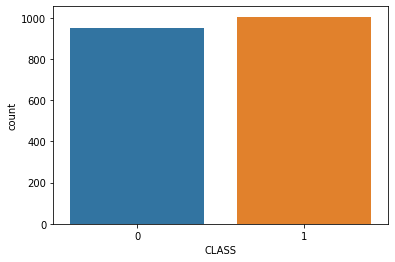

In [12]:
sns.countplot(x="CLASS",data=comb_df)

###Data Cleaning

In [13]:
processed_mails=[]
for i in tqdm(comb_df['CONTENT']):
    #Regular expression that removes all the html tags pressent in the reviews
    i=re.sub('(<[\w\s]*/?>)',"",i)
    #Expanding all the contractions present in the review to is respective actual form
    i=contractions.fix(i)
    #Removing all the special charactesrs from the review text
    i=re.sub('[^a-zA-Z0-9\s]+',"",i)
    #Removing all the digits present in the review text
    i=re.sub('\d+',"",i)
    # i=re.sub('[\n\t\s\b]','',i)
    #Removing the html links
    s=re.sub(r"http\S+", " ", i)
    i=re.sub(r"www.\S+", " ", s)
    #Removing some patterns
    i=re.sub("\\s*\\b(?=\\w*(\\w)\\1{2,})\\w*\\b",' ',i)
    i=re.sub(r"\S*\.com\S*|\S*watch\?\S*",'', i)
    #Making all the review text to be of lower case as well as removing the stopwords and words of length less than 3
    processed_mails.append(" ".join([j.lower() for j in i.split() if j not in stopwords and len(j)>=3]))

100%|██████████| 1956/1956 [00:00<00:00, 9886.78it/s] 


In [14]:
processed_df=pd.DataFrame({'CleanedContent':processed_mails,'Class':list(comb_df['CLASS'])})
processed_df.head()

,CleanedContent,Class
0,huh anyway check youtube channel kobyoshi,1
1,hey guys check new channel first vid this the ...,1
2,test say murdevcom,1
3,shaking sexy ass channel enjoy,1
4,watchvvtarggvgtwq check,1


In [15]:
processed_df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in processed_df['CleanedContent']] 
print(processed_df['tokenized_text'].head(10))

0     [huh, anyway, check, youtube, channel, kobyoshi]
1    [hey, guys, check, new, channel, first, vid, t...
2                               [test, say, murdevcom]
3                 [shaking, sexy, ass, channel, enjoy]
4                                              [check]
5    [hey, check, new, website, this, site, kids, s...
6                                 [subscribe, channel]
7     [turned, mute, soon, came, wanted, check, views]
8                 [you, check, channel, funny, videos]
9                [shouldd, check, channel, tell, next]
Name: tokenized_text, dtype: object


###Splitting Data

In [16]:
#Splitting the data into dependent and independent variables i.e, features and the target columns
X=processed_df['CleanedContent']
Y=processed_df['Class']

In [17]:
len(X)

1956

In [18]:
missing_value = X.loc[X == '']
print(len(missing_value))

84


In [19]:
for i in missing_value.index:
  # print(i)
  X = X.drop(i)
  Y = Y.drop(i)

In [20]:
len(X)

1872

In [21]:
#Splitting the data such that 33% will be used for testing and the remaining 67% will be used for training. 
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.33)
#when stratify is provided the splitting of data into train and test datasets agree with the composition of actual possitive and negative reviews present in the dataset

In [22]:
x_train

1649                                        ilove shakira
464           how song million views million people world
1802                                        gangnam style
1772    stop wasting your time get paid mess around fa...
511                                   please look channel
                              ...                        
1829                                             she good
1258                                subscribe daily vines
1009                     can get views subscribers reason
645     love you because make smile sad cheer beautifu...
1740                    pleas subscribe channel gamezzmta
Name: CleanedContent, Length: 1254, dtype: object

###Vectorization

In [ ]:
# First we split all the sentences(rows here) into words and save it in a list
words_in_sentences=[]
for i in tqdm(X):
    words_in_sentences.append(i.split())

# Then we create a Word2Vec model which will vectorize all the words in the list,
# where each word will have its vector value as an array
# size -> Dimensionality of the feature vectors.
# min_count -> Ignores all words with total absolute frequency lower than this
# window -> The maximum distance between the current and predicted word within a sentence.
# workers -> Use these many worker threads to train the model
model = Word2Vec(sentences=words_in_sentences, size=10, window = 5, min_count=1, workers=-1)



In [23]:
words_in_sentences=[]
for i in tqdm(X):
    words_in_sentences.append(i.split())

100%|██████████| 1872/1872 [00:00<00:00, 300464.45it/s]


In [24]:
model = Word2Vec(sentences=words_in_sentences, size=10, min_count=1, workers=-1)

In [25]:
# jump  = [0.1, 0.5, 1.2]

In [26]:
model.wv.most_similar('song', topn=10)

[('count', 0.8697108626365662),
 ('lets', 0.843300998210907),
 ('comforter', 0.8360740542411804),
 ('watchvdtqcftrfac', 0.824195146560669),
 ('definitley', 0.8197048306465149),
 ('itt', 0.8080573678016663),
 ('makes', 0.7999967932701111),
 ('giant', 0.7939600348472595),
 ('disposable', 0.7873681783676147),
 ('changeable', 0.7814050316810608)]

In [27]:
vocab = model.wv.vocab
print(len(vocab))

3586


In [28]:
# count = 0
# for sentence in tqdm(processed_df['CleanedContent']):
#   for token in sentence:
#     if token != [voc for voc in vocab]:
#       count+=1

In [29]:
# print(count)

In [30]:
def avg_w2vec(sentences):
    transformed=[]
    for sentence in tqdm(sentences):
        count=0
        vector=np.zeros(10)
        # vector+=np.mean([model[token] for token in sentence], axis=0)
        # transformed.append(vector)
        for word in sentence.split():
            if word in vocab:
                vector+=model.wv.get_vector(word)
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
        else:
            print(sentence)
    return np.array(transformed)

# model_vector = (np.mean([model[token] for token in row['tokenized_text']], axis=0)).tolist()

In [31]:
x_train_transformed=avg_w2vec(x_train)
x_test_transformed=avg_w2vec(x_test)

100%|██████████| 618/618 [00:00<00:00, 17155.53it/s]


In [32]:
print(len(x_train_transformed),len(x_train))

1254 1254


In [33]:
x_train.loc[:1310]

1649                                        ilove shakira
464           how song million views million people world
1802                                        gangnam style
1772    stop wasting your time get paid mess around fa...
511                                   please look channel
                              ...                        
1225    near one eminems actual best songs real fans k...
139     stupid people video not billion visits have th...
1158                    this song rape cheating basically
1426                            those saw lost understand
1310                                       love this song
Name: CleanedContent, Length: 604, dtype: object

###K-Nearest Neighbours

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid_params = { 'n_neighbors' : [10,20,30,40,50,60],
               'metric' : ['manhattan']}
knn=KNeighborsClassifier()
clf = RandomizedSearchCV(knn, grid_params, random_state=0,n_jobs=-1,verbose=1)
clf.fit(x_train_transformed,y_train)

print("Best parameters : ",clf.best_params_)
print("Best score : ",clf.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters :  {'n_neighbors': 10, 'metric': 'manhattan'}
Best score :  0.7160733067729084


In [35]:
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix
train_fpr,train_tpr,thresholds=roc_curve(y_train,clf.predict_proba(x_train_transformed)[:,1])
test_fpr,test_tpr,thresholds=roc_curve(y_test,clf.predict_proba(x_test_transformed)[:,1])

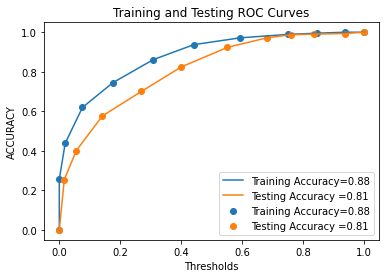

In [37]:
import matplotlib.pyplot as plt
plt.plot(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.scatter(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.scatter(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("ACCURACY")
plt.title("Training and Testing ROC Curves")
plt.show()

In [38]:
print(classification_report(y_train,clf.predict(x_train_transformed)))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75       618
           1       0.74      0.86      0.80       636

    accuracy                           0.78      1254
   macro avg       0.79      0.78      0.78      1254
weighted avg       0.78      0.78      0.78      1254



In [40]:
print(classification_report(y_test,clf.predict(x_test_transformed)))

              precision    recall  f1-score   support

           0       0.77      0.60      0.67       304
           1       0.68      0.82      0.75       314

    accuracy                           0.71       618
   macro avg       0.72      0.71      0.71       618
weighted avg       0.72      0.71      0.71       618



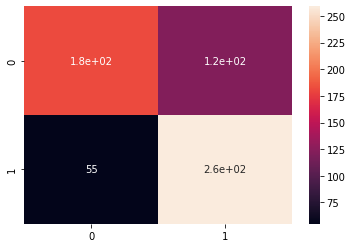

In [39]:
sns.heatmap(confusion_matrix(y_test,clf.predict(x_test_transformed)),annot=True)
plt.show()

In [41]:
cm = confusion_matrix(y_test, clf.predict(x_test_transformed))
index = ['Actually Ham', 'Actually Spam']
df_cm = pd.DataFrame(cm, columns = ['Predicted to be Ham', 'Predicted to be Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm.T

,Actually Ham,Actually Spam
Predicted to be Ham,182,55
Predicted to be Spam,122,259
